Type
Spam    501
Ham     250
Name: count, dtype: int64
0.6653386454183267
1.0 1.0 1.0


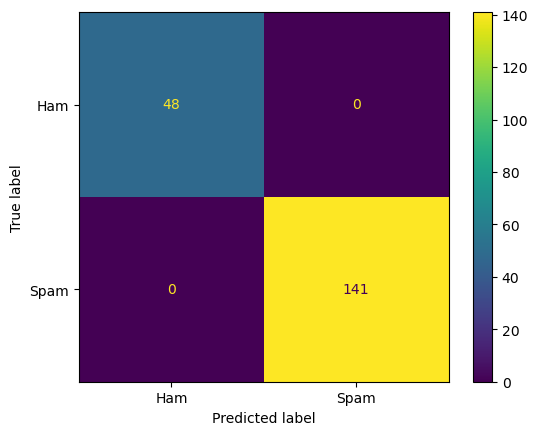

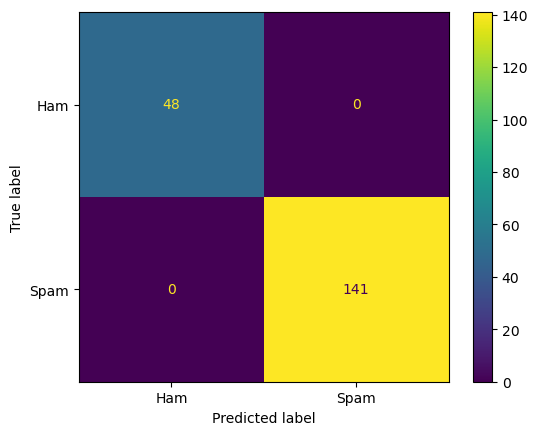

In [2]:
import tarfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

data = []
with tarfile.open("20021010_spam.tar.bz2", "r:bz2") as tar:
    for tarinfo in tar:
        row = {'Name': tarinfo.name}
        if tarinfo.isreg():
            row['Type'] = 'Spam'
        data.append(row)


with tarfile.open("20021010_hard_ham.tar.bz2", "r:bz2") as tar:
    for tarinfo in tar:
        row = {'Name': tarinfo.name}
        if tarinfo.isreg():
            row['Type'] = 'Ham'
        data.append(row)

df = pd.DataFrame(data)

df.columns

ham = df[df['Type']=='Ham']
spam = df[df['Type']=='Spam']

spam_percentage = (len(spam)/len(df))
ham_percentage = (len(ham)/len(df))

print(df['Type'].value_counts())
print((df['Type'] == 'Spam').sum()/df.shape[0])

#train-test

SEED = 1234
df_train, df_test = train_test_split(df,random_state=SEED)

df_train['Type'].value_counts()

acc_test = (df_test['Type'] == 'Spam').sum()/df_test.shape[0]
#print(acc_test)

cv = CountVectorizer()
X_train = cv.fit_transform(df_train['Name'])
X_test = cv.transform(df_test['Name'])

le = LabelEncoder()
y_train = le.fit_transform(df_train['Type'])
y_test = le.transform(df_test['Type'])

X_train.shape, y_train.shape

bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_test
y_pred_bnb = bnb.predict(X_test)

acc_bnb = (y_test == y_pred_bnb).sum()/y_test.shape[0]

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
acc_mnb = (y_test == y_pred_mnb).sum()/y_test.shape[0]


y_test_inv = le.inverse_transform(y_test)
y_pred_mnb_inv = le.inverse_transform(y_pred_mnb)
tp = ((y_test_inv == 'Ham') & (y_pred_mnb_inv == 'Ham')).sum()
fp = ((y_test_inv == 'Spam') & (y_pred_mnb_inv == 'Ham')).sum()
fn = ((y_test_inv == 'Ham') & (y_pred_mnb_inv == 'Spam')).sum()
tn = ((y_test_inv == 'Spam') & (y_pred_mnb_inv == 'Spam')).sum()
acc = (tp+tn)/(tp+fp+tn+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(acc, precision, recall)

np.array([[tp,fn],[fp,tn]])

cm_display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mnb, display_labels=['Ham', 'Spam'])
cm_display.plot()
plt.show()